# Proyecto Simulación Estocástica

## Gaussian Free Field

In [1]:
function Phimr = campo_gaussiano(M)
  if mod(M,2) ~= 0
    error('M debe ser par');
  end

  N = M;
  m = 0;
  alpha = zeros(M);

  [X, Y] = meshgrid(linspace(0, 1/2, M/2+1), linspace(0, 1/2, M/2+1));

  % Parte superior izquierda
  for i = 2:(M+1)/2
    for j = 2:(M+1)/2
      alpha(i,j) = randn() / sqrt((i-1)^2 + (j-1)^2 + m^2) / (2*pi);
    end
  end

  % Extensión al resto del dominio por simetría
  for i = 2:M
    for j = 2:M
      if i > (M+1)/2 && j > (M+1)/2
        alpha(i,j) =  alpha(M - i + 2, M - j + 2);
      elseif i > (M+1)/2
        alpha(i,j) = -alpha(M - i + 2, j);
      elseif j > (M+1)/2
        alpha(i,j) = -alpha(i, M - j + 2);
      end
    end
  end

  % Transformada de Fourier y restricción al dominio relevante
  Phimr = real(fft2(alpha));
  Phimr = Phimr(1:M/2+1, 1:M/2+1);
end












The FLTK graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.
The qt toolkit is recommended instead.

















































In [8]:
function guardar_campo_3D(Phimr, nombre_salida)
    % Usa gnuplot como motor de gráficos
    graphics_toolkit("gnuplot");

    % Crear figura
    figure('visible','off');   % pon 'on' si quieres verla

    % Superficie 3D
    surf(Phimr);

    % Opciones de estilo
    shading interp;                 % suaviza la superficie
    colormap(hot);                  % colores bonitos
    colorbar;                       % barra de colores

    % Ejes y vista
    axis tight;
    view(45, 45);                   % ángulo agradable
    title('Campo Gaussiano en 3D');

    % Guardar la imagen
    print([nombre_salida '.jpg'], '-djpg', '-r300');   % alta resolución
    close(gcf);
end


### Campo Gaussiano en 2D

In [6]:
imwrite(campo_gaussiano(2000), ['campo_gff_1_2D_M_2000.jpg'])

In [17]:
imwrite(campo_gaussiano(1000), ['campo_gff_1_2D_M_1000.jpg'])

### Campo Gaussiano en 3D

In [18]:
guardar_campo_3D(campo_gaussiano(1000), 'campo_gff_1_3D_M_1000')



multiplot> set style increment default;
                               ^
           line 0: warning: deprecated command


In [9]:
guardar_campo_3D(campo_gaussiano(2000), 'campo_gff_1_3D_M_2000')



multiplot> set style increment default;
                               ^
           line 0: warning: deprecated command


## $C_a$ (conjuntos de nivel) y $A_a$ (conjuntos de salida)

### Función Pintar

In [2]:
function  res = Pintar3(A,B,lp,mp,N)
res=B;
puntas1(1)=lp;
puntas2(1)=mp;
k=0;

while length(puntas1)>k
    k=k+1;
    l=puntas1(k);
    m=puntas2(k);
    if l<N && res(l+1,m)==0 && A(l+1,m)==1
        res(l+1,m)=1;
        puntas1(end+1)=l+1;
        puntas2(end+1)=m;
    end

    if l>1 && res(l-1,m)==0 && A(l-1,m)==1
        res(l-1,m)=1;
        puntas1(end+1)=l-1;
        puntas2(end+1)=m;
    end

    if m<N && res(l,m+1)==0 && A(l,m+1)==1
        res(l,m+1)=1;
        puntas1(end+1)=l;
        puntas2(end+1)=m+1;
    end

    if m>1 && res(l,m-1)==0 && A(l,m-1)==1
        res(l,m-1)=1;
        puntas1(end+1)=l;
        puntas2(end+1)=m-1;
    end
end
end 

In [3]:
function conjunto_nivel(Phimr, a, nombre_salida)
    graphics_toolkit("gnuplot");

    % === parámetros iniciales ===
    K = size(Phimr,1);   
    oi = round(K/2);     
    oj = round(K/2);

    % === construir A ===
    A = abs(Phimr) < a;

    % bordes activados
    Atemp = A;
    Atemp(1:K,1) = 1;
    Atemp(1:K,K) = 1;
    Atemp(1,1:K) = 1;
    Atemp(K,1:K) = 1;

    % === Graficar la imagen de A_a ===
    figure('visible','on');
    imagesc(Atemp);
    colormap(hot);
    axis equal off; hold on;

    
    % guardar imagen
    print([nombre_salida '.jpg'], '-djpg', '-r300');
end




gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


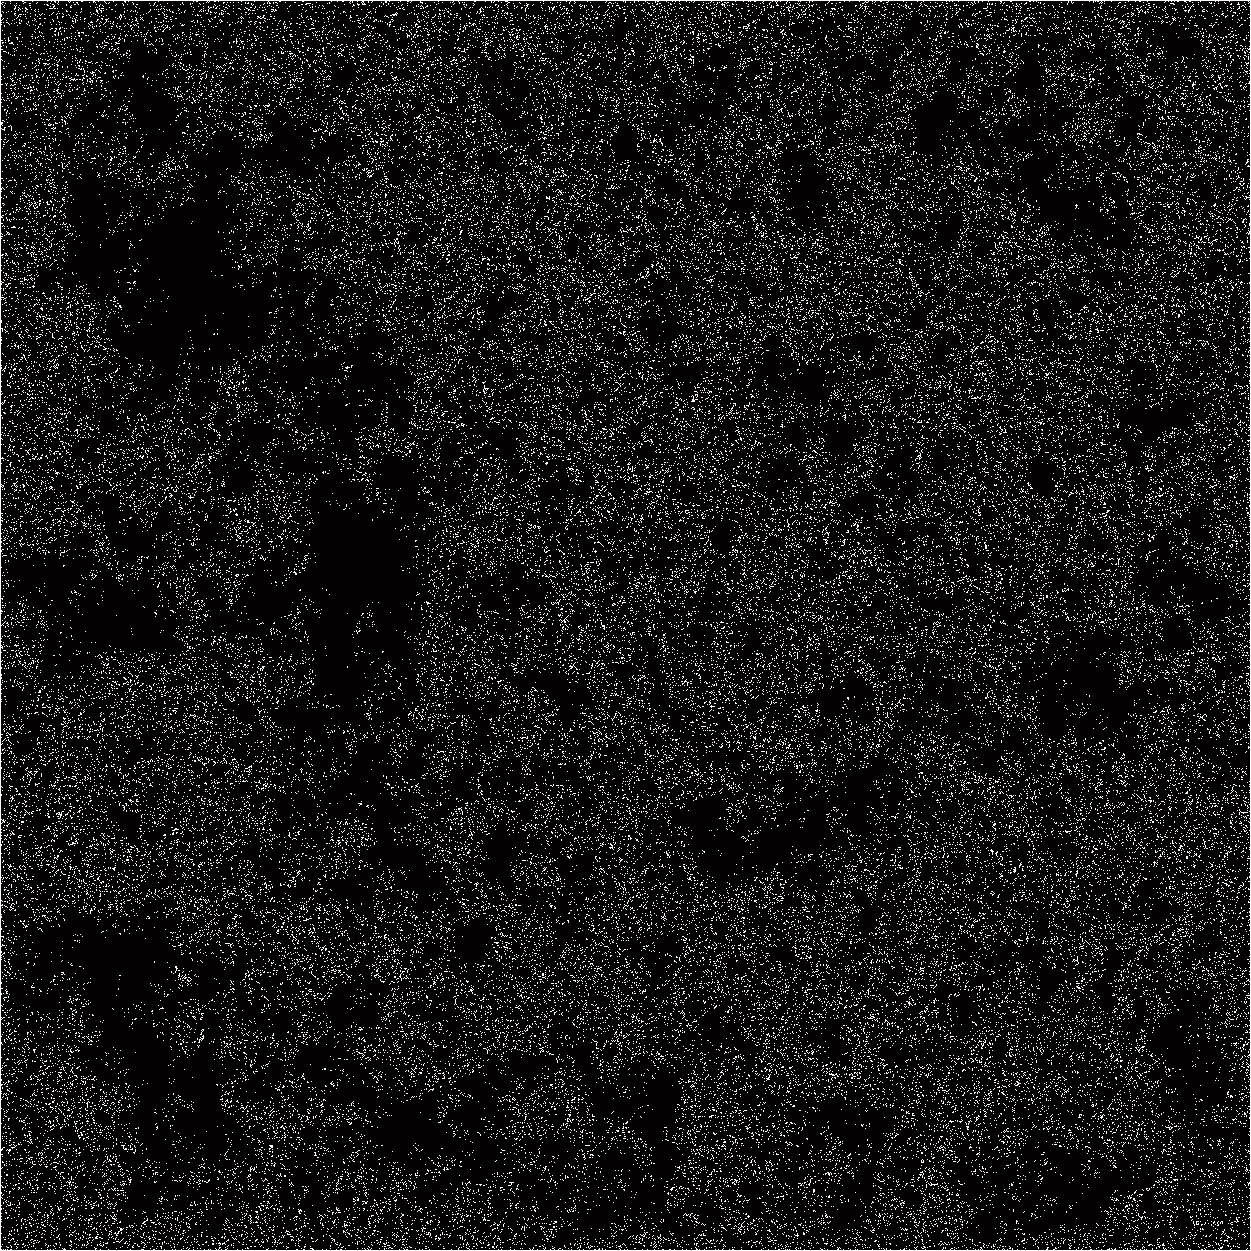

In [21]:
conjunto_nivel(campo_gaussiano(2500), 0.1, 'conjunto_nivel_M_2500_a_0.1')




gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


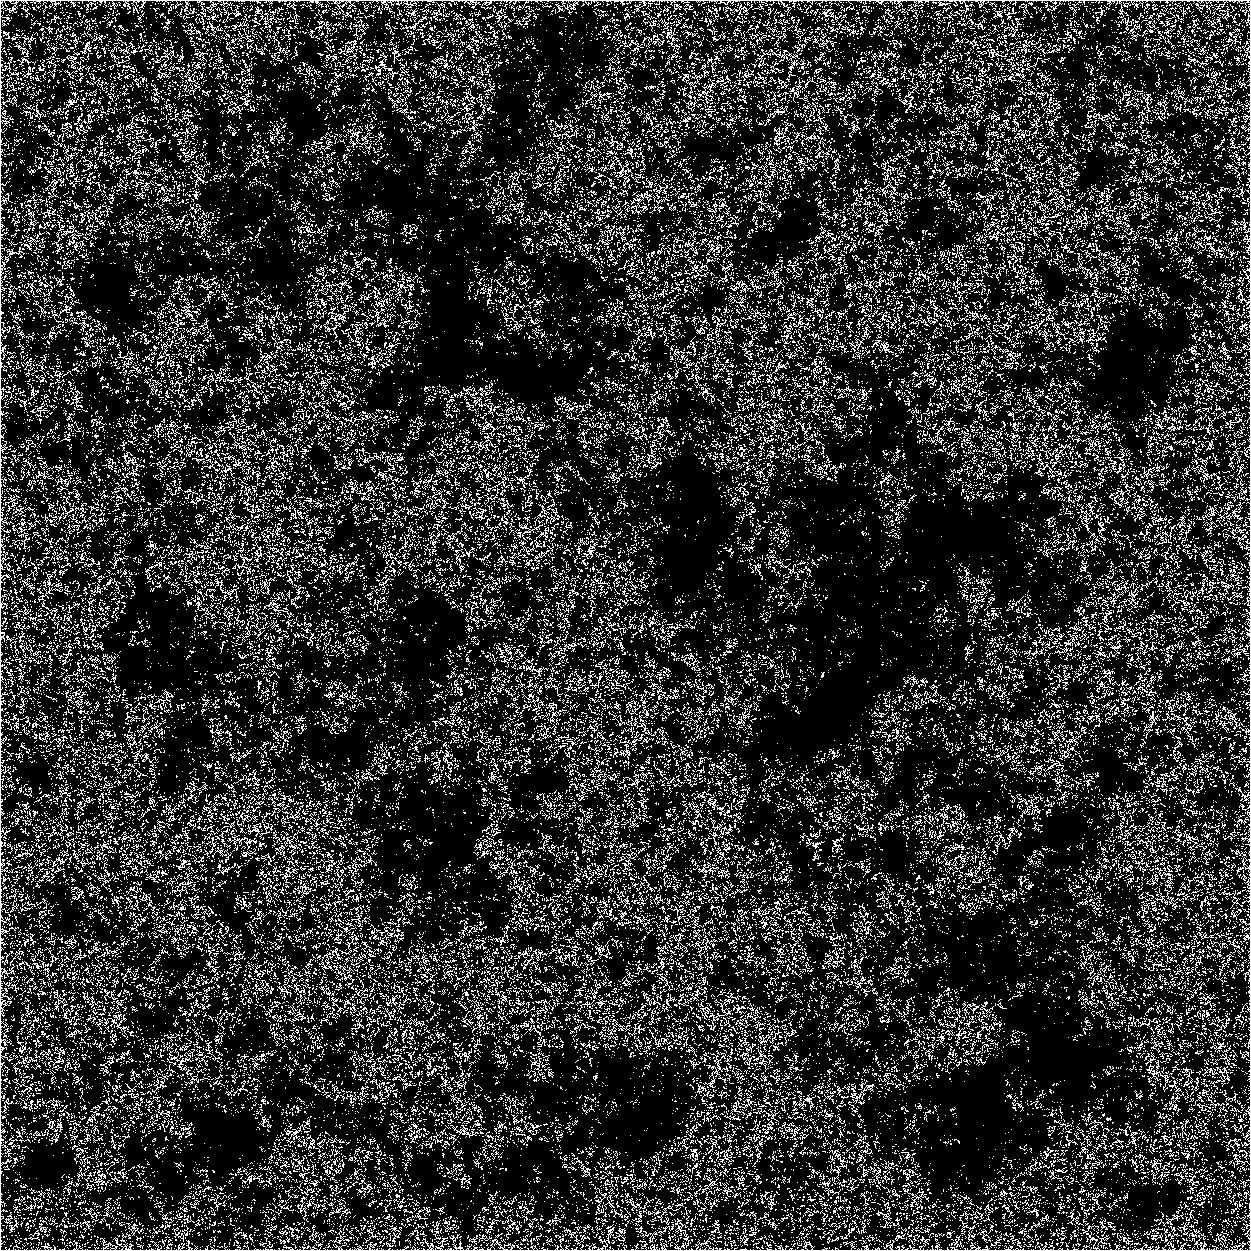

In [20]:
%M=2500
conjunto_nivel(campo_gaussiano(2500), 0.25, 'conjunto_nivel_M_2500_a_0.25')



gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


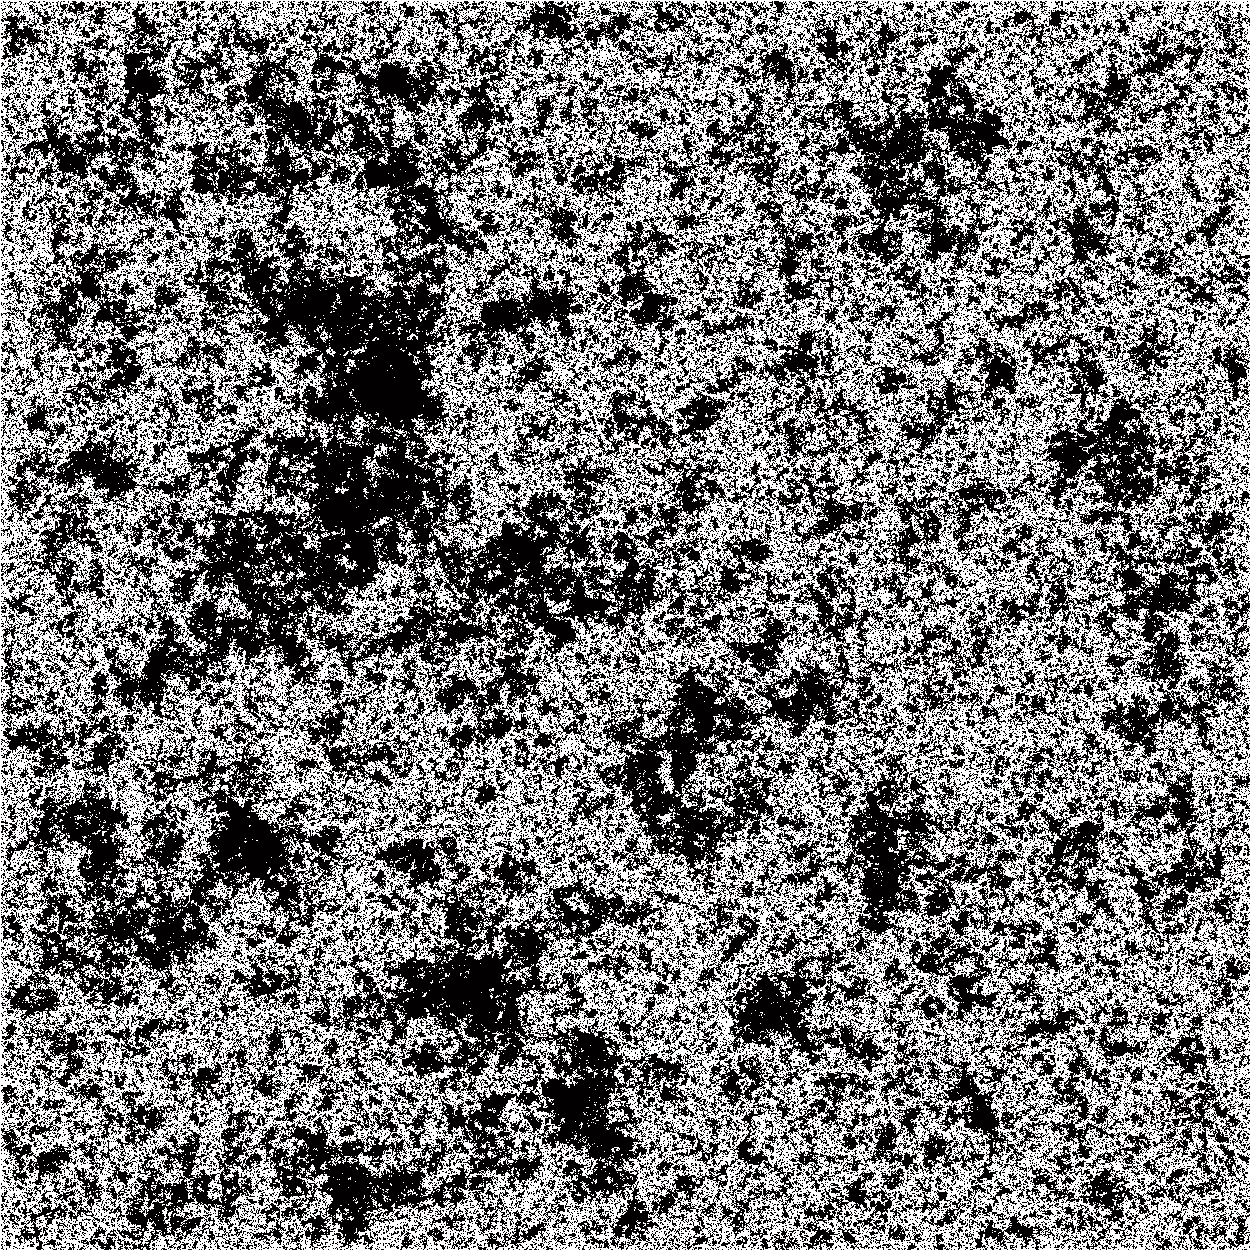

In [22]:
conjunto_nivel(campo_gaussiano(2500), sqrt(pi/8), 'conjunto_nivel_M_2500_a_0.62')



gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


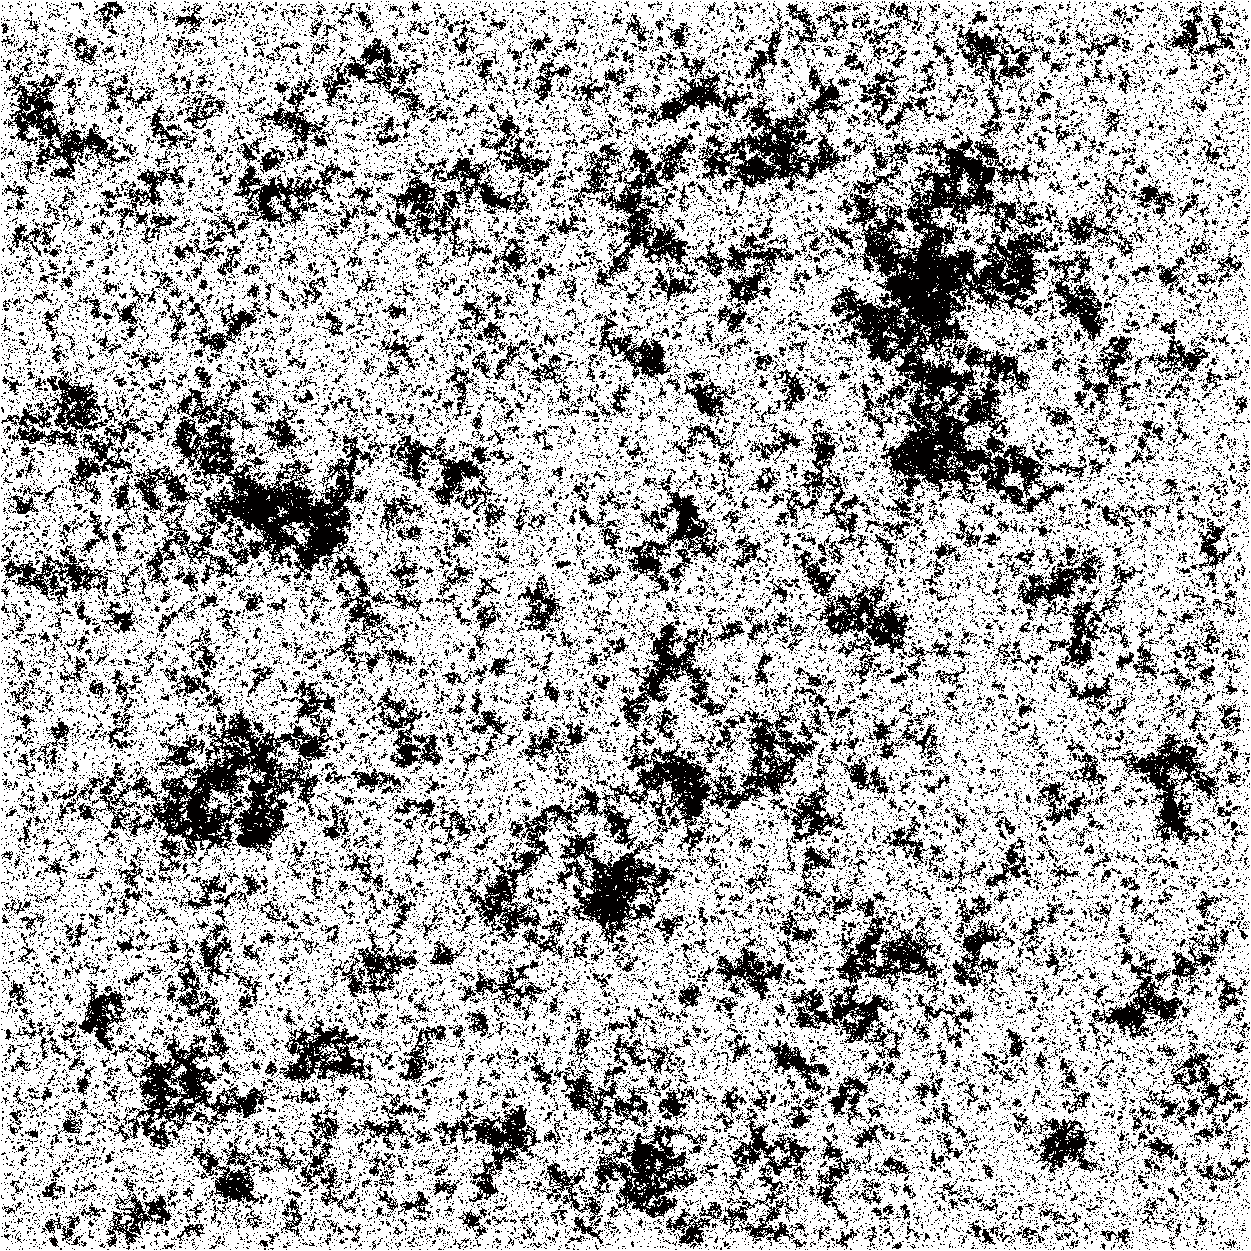

In [23]:
conjunto_nivel(campo_gaussiano(2500), 1, 'conjunto_nivel_M_2500_a_1')



gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


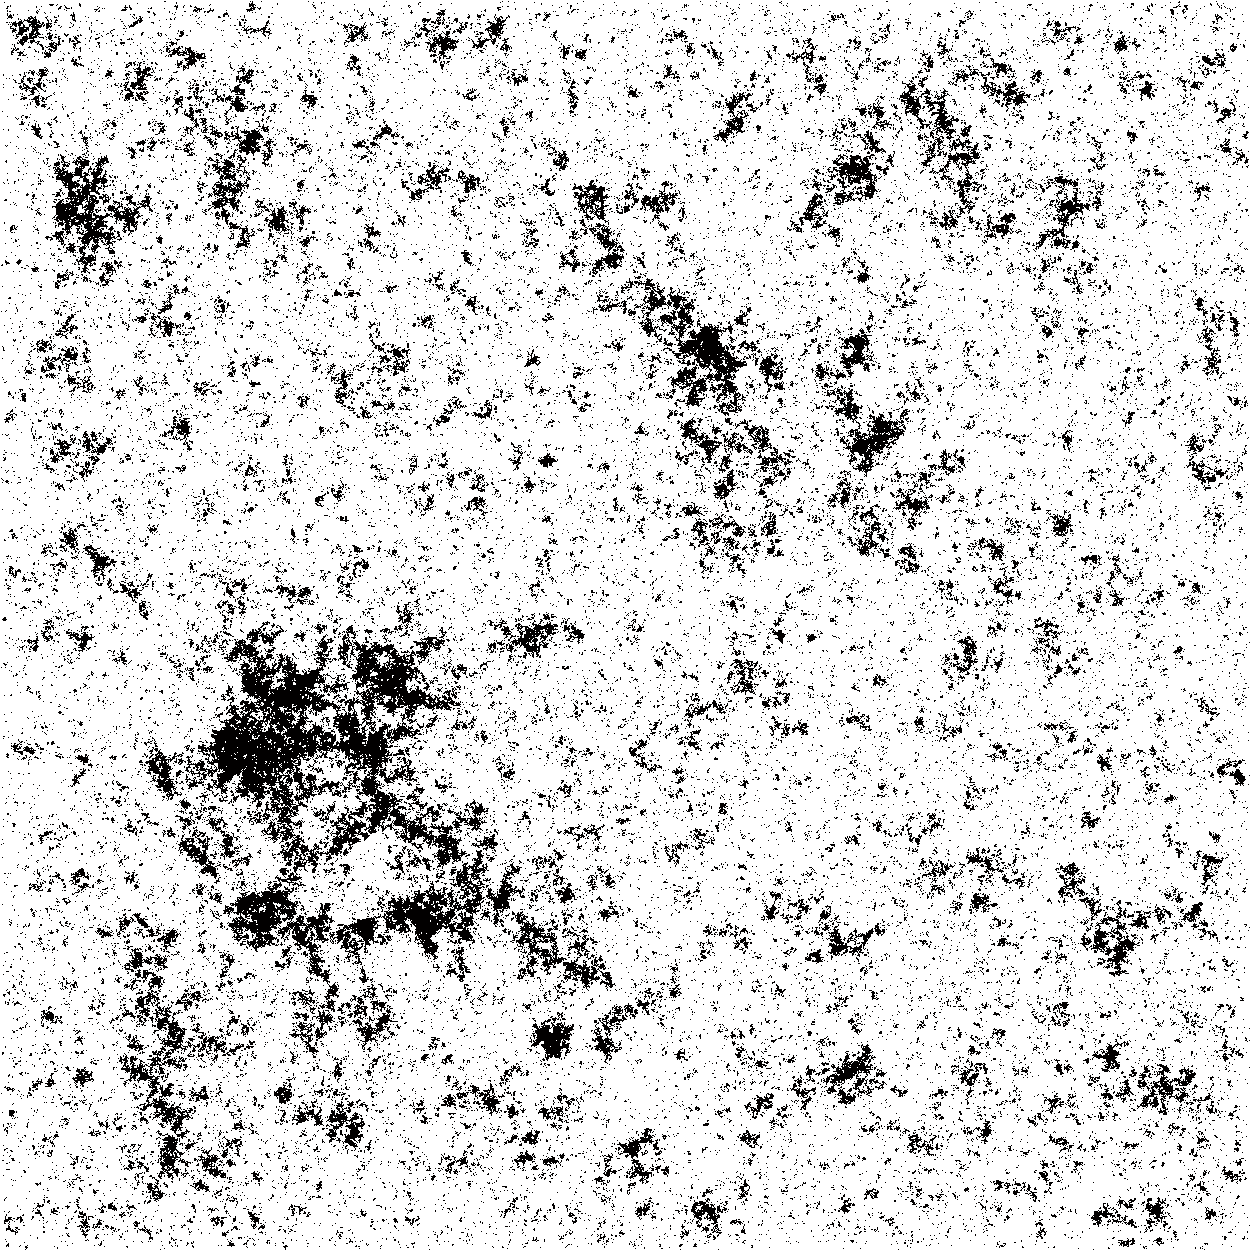

In [24]:
conjunto_nivel(campo_gaussiano(2500), 1.5, 'conjunto_nivel_M_2500_a_1.5')



gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


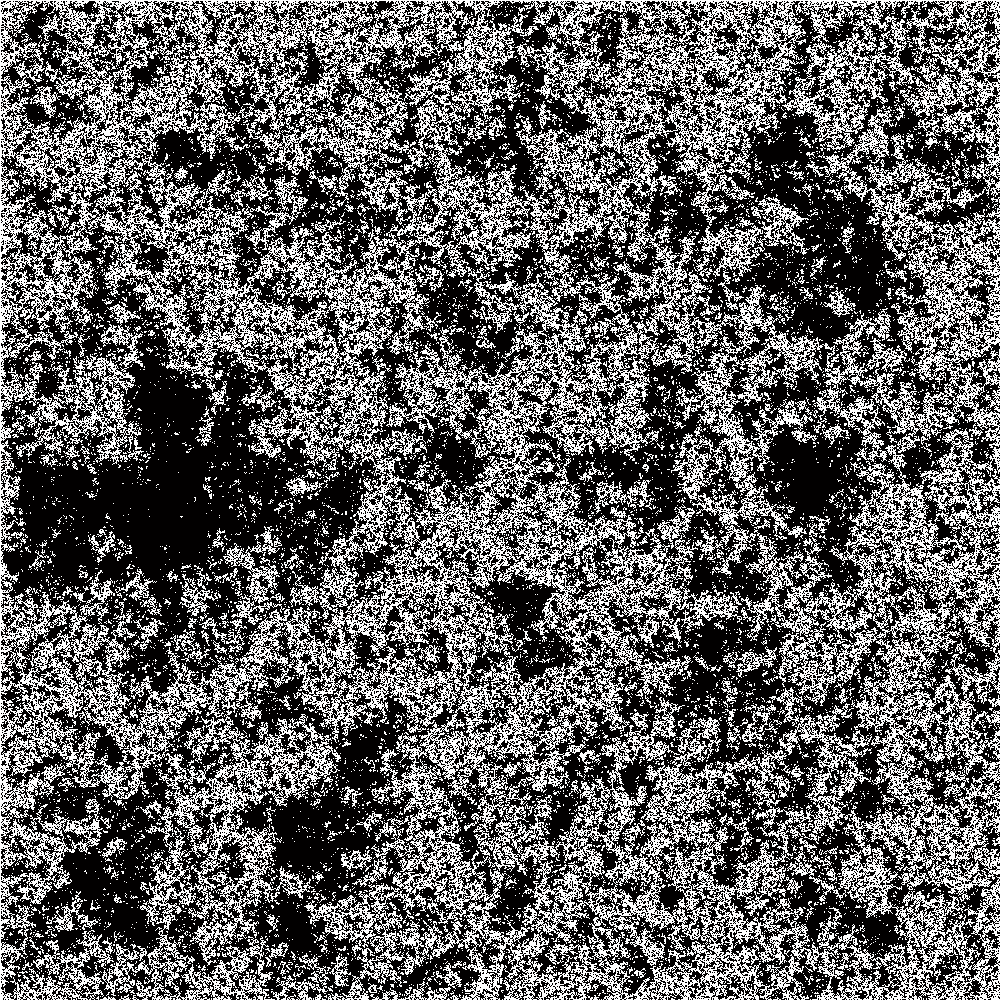

In [15]:
conjunto_nivel(campo_gaussiano(2000), 0.5, 'conjunto_nivel_M_2500_a_0.5')

In [4]:
function graficar_A_a(Phimr, a, nombre_salida)
    graphics_toolkit("gnuplot");

    % === parámetros iniciales ===
    K = size(Phimr,1);   
    oi = round(K/2);     
    oj = round(K/2);

    % === construir A ===
    A = abs(Phimr) < a;

    % bordes activados
    Atemp = A;
    Atemp(1:K,1) = 1;
    Atemp(1:K,K) = 1;
    Atemp(1,1:K) = 1;
    Atemp(K,1:K) = 1;

    % === obtener A_a mediante Pintar3 ===
    B = zeros(K);
    A_a = Pintar3(Atemp, B, 1, 1, K);

    % === Graficar la imagen de A_a ===
    figure('visible','on');
    imagesc(A_a);
    colormap(hot);
    axis equal off; hold on;
    plot(oj, oi, 'r.', 'MarkerSize', 10);
    

    
    % guardar imagen
    print([nombre_salida '.jpg'], '-djpg', '-r300');
end


#### M=100



The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please selec

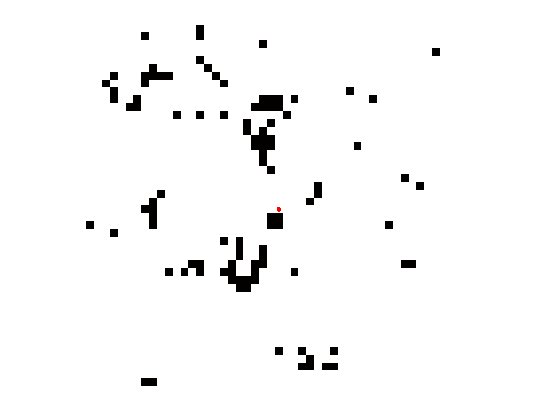

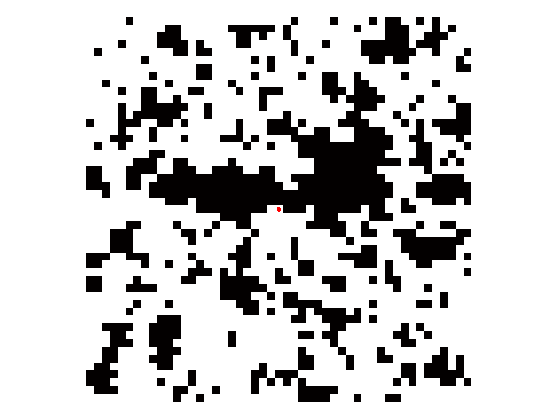

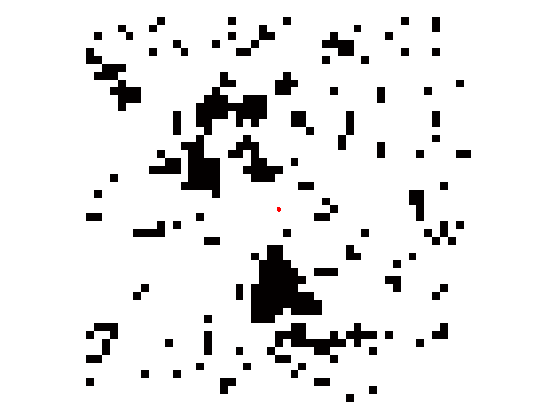

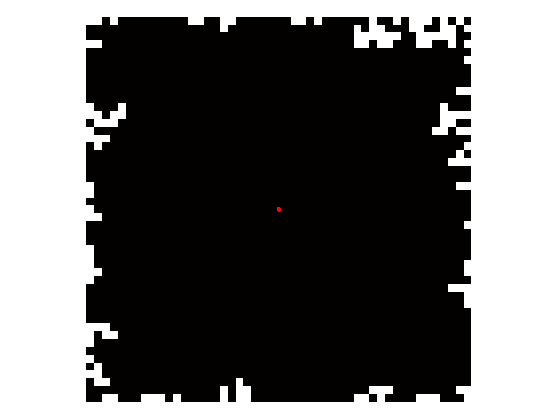

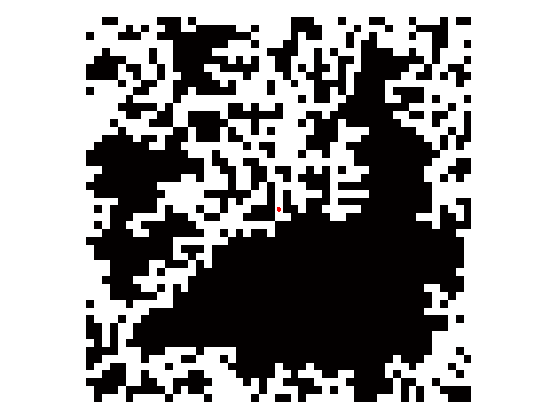

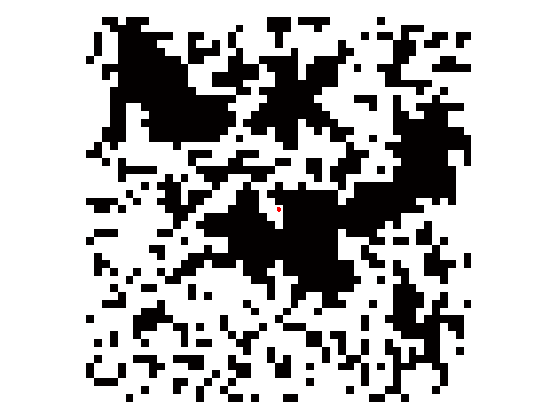

In [5]:
graficar_A_a(campo_gaussiano(100), 0.25, 'A_a_M_100_a_0.25')
graficar_A_a(campo_gaussiano(100), 0.5, 'A_a_M_100_a_0.5')
graficar_A_a(campo_gaussiano(100), sqrt(pi/8), 'A_a_M_100_a_0.62')
graficar_A_a(campo_gaussiano(100), 0.75, 'A_a_M_100_a_0.75')
graficar_A_a(campo_gaussiano(100), 1, 'A_a_M_100_a_1')
graficar_A_a(campo_gaussiano(100), 1.5, 'A_a_M_100_a_1.5')




gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


gnuplot> set terminal aqua enhanced title "Figure 2" size 560 420 

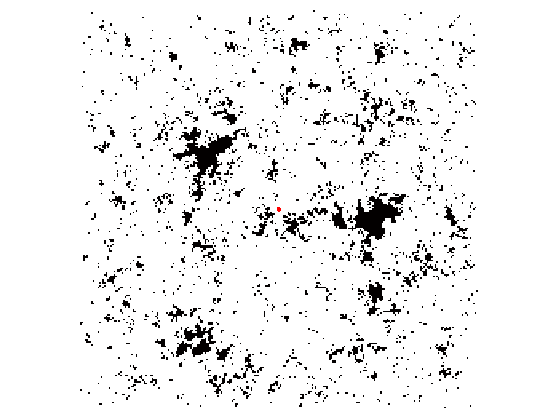

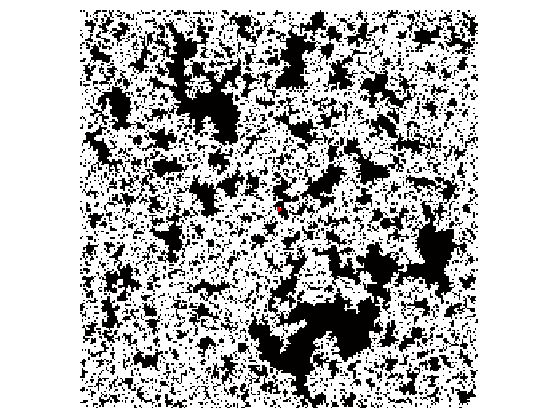

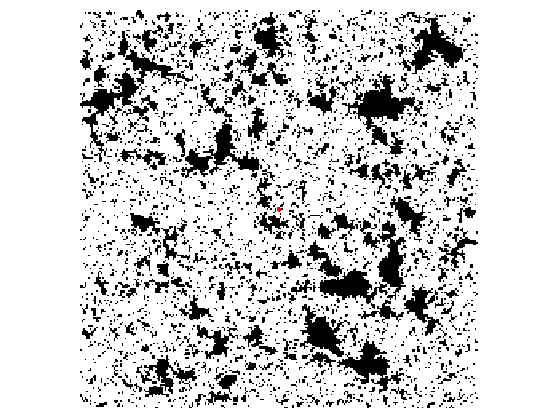

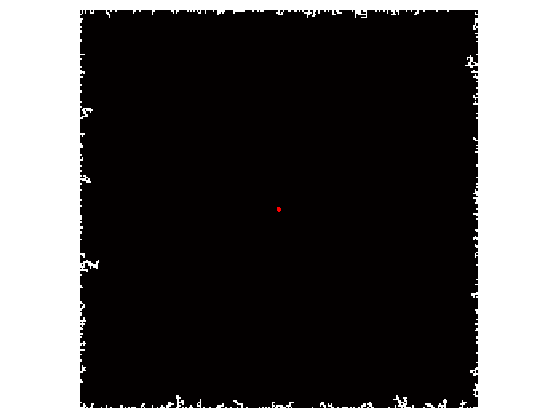

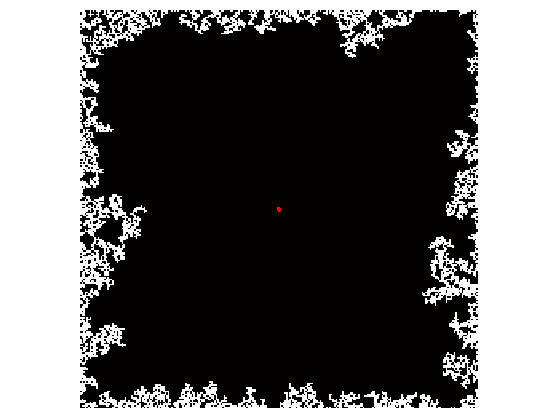

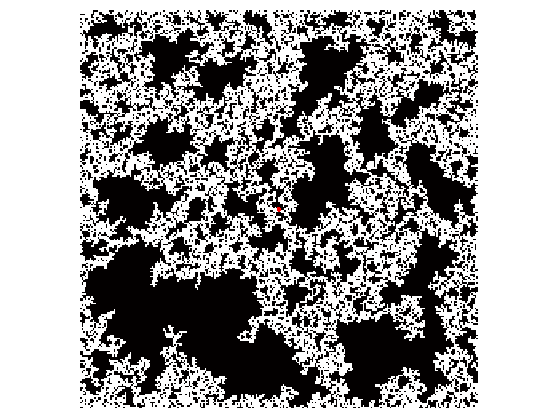

In [6]:
%M=500
graficar_A_a(campo_gaussiano(500), 0.25, 'A_a_M_500_a_0.25')
graficar_A_a(campo_gaussiano(500), 0.5, 'A_a_M_500_a_0.5')
graficar_A_a(campo_gaussiano(500), sqrt(pi/8), 'A_a_M_500_a_0.62')
graficar_A_a(campo_gaussiano(500), 0.75, 'A_a_M_500_a_0.75')
graficar_A_a(campo_gaussiano(500), 1, 'A_a_M_500_a_1')
graficar_A_a(campo_gaussiano(500), 1.5, 'A_a_M_500_a_1.5')




gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


gnuplot> set terminal aqua enhanced title "Figure 2" size 560 420 

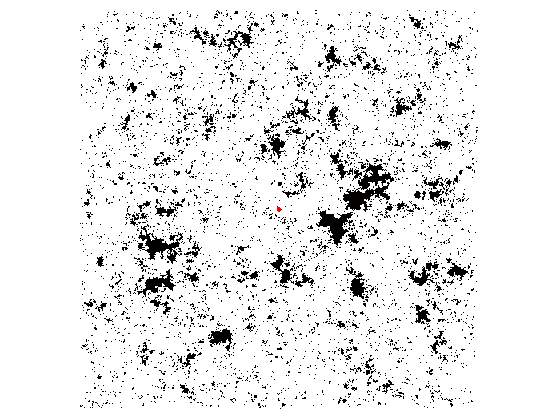

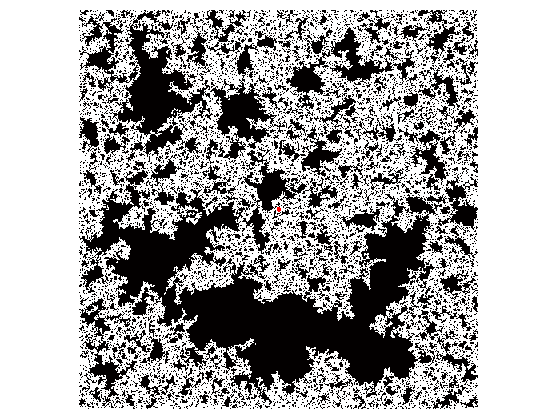

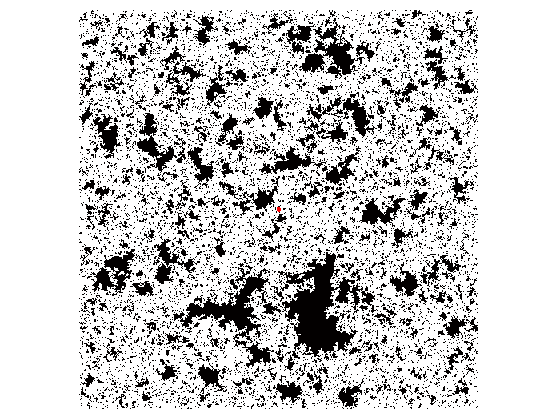

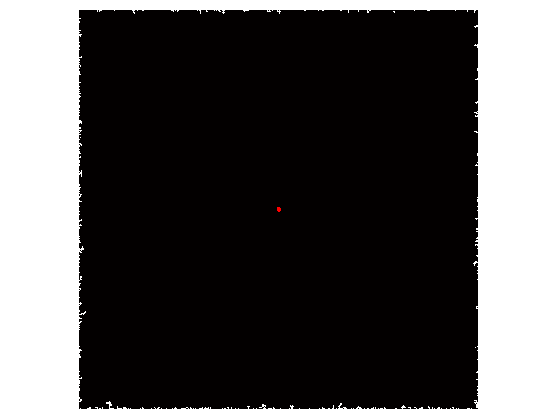

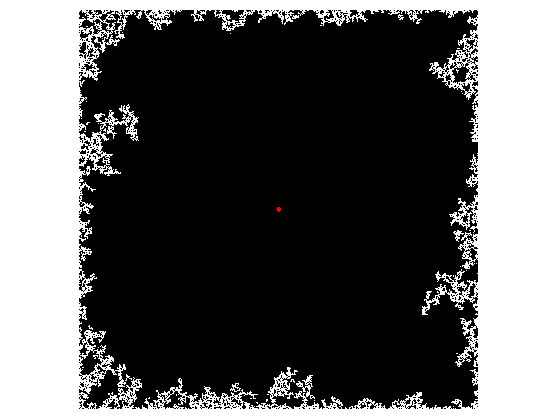

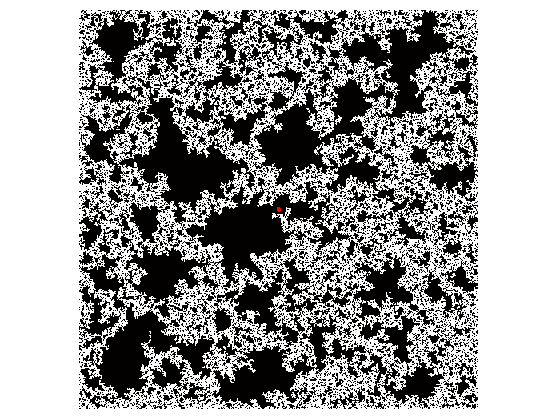

In [7]:
%M=1000
graficar_A_a(campo_gaussiano(1000), 0.25, 'A_a_M_1000_a_0.25')
graficar_A_a(campo_gaussiano(1000), 0.5, 'A_a_M_1000_a_0.5')
graficar_A_a(campo_gaussiano(1000), sqrt(pi/8), 'A_a_M_1000_a_0.62')
graficar_A_a(campo_gaussiano(1000), 0.75, 'A_a_M_1000_a_0.75')
graficar_A_a(campo_gaussiano(1000), 1, 'A_a_M_1000_a_1')
graficar_A_a(campo_gaussiano(1000), 1.5, 'A_a_M_1000_a_1.5')




gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


gnuplot> set terminal aqua enhanced title "Figure 2" size 560 420 

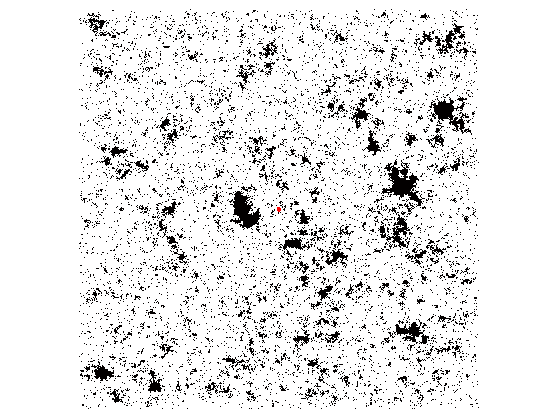

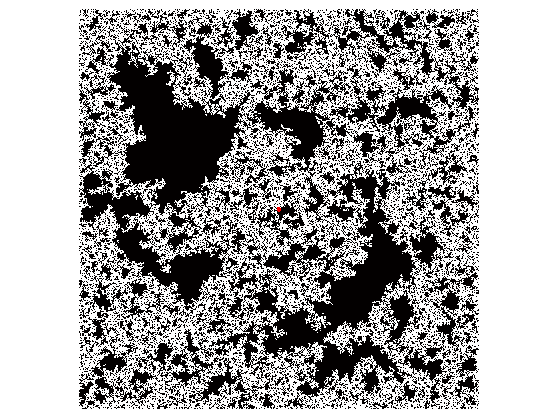

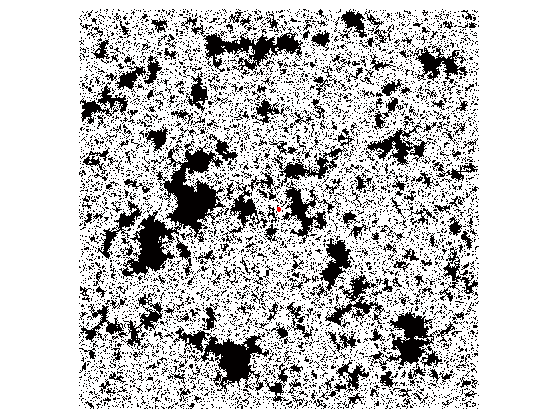

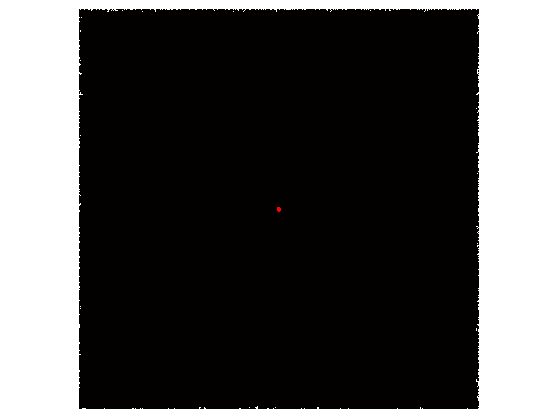

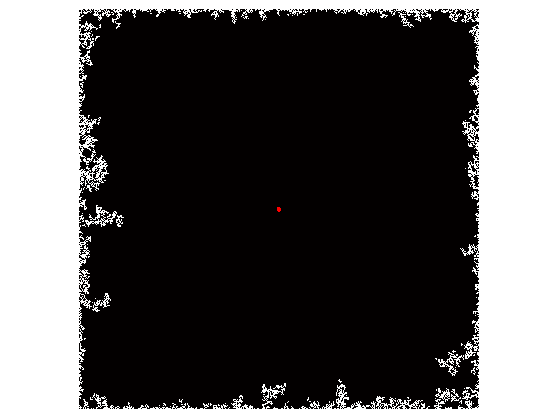

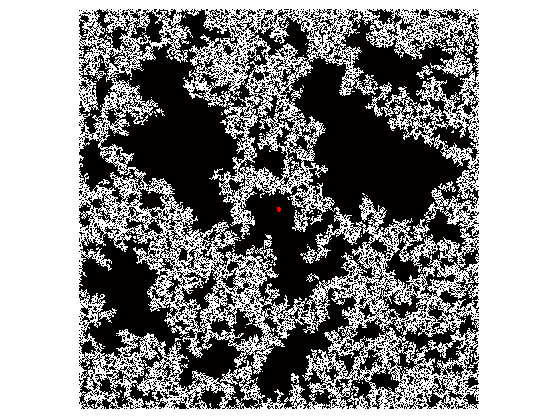

In [8]:
%M=2000
graficar_A_a(campo_gaussiano(2000), 0.25, 'A_a_M_2000_a_0.25')
graficar_A_a(campo_gaussiano(2000), 0.5, 'A_a_M_2000_a_0.5')
graficar_A_a(campo_gaussiano(2000), sqrt(pi/8), 'A_a_M_2000_a_0.62')
graficar_A_a(campo_gaussiano(2000), 0.75, 'A_a_M_2000_a_0.75')
graficar_A_a(campo_gaussiano(2000), 1, 'A_a_M_2000_a_1')
graficar_A_a(campo_gaussiano(2000), 1.5, 'A_a_M_2000_a_1.5')

In [9]:
%M=5000
graficar_A_a(campo_gaussiano(5000), 0.25, 'A_a_M_5000_a_0.25')
graficar_A_a(campo_gaussiano(5000), 0.5, 'A_a_M_5000_a_0.5')
graficar_A_a(campo_gaussiano(5000), sqrt(pi/8), 'A_a_M_5000_a_0.62')
graficar_A_a(campo_gaussiano(5000), 0.75, 'A_a_M_5000_a_0.75')
graficar_A_a(campo_gaussiano(5000), 1, 'A_a_M_5000_a_1')
graficar_A_a(campo_gaussiano(5000), 1.5, 'A_a_M_5000_a_1.5')

In [ ]:
%M=10000
graficar_A_a(campo_gaussiano(10000), 0.25, 'A_a_M_10000_a_0.25')
graficar_A_a(campo_gaussiano(10000), 0.5, 'A_a_M_10000_a_0.5')
graficar_A_a(campo_gaussiano(10000), sqrt(pi/8), 'A_a_M_10000_a_0.62')
graficar_A_a(campo_gaussiano(10000), 0.75, 'A_a_M_10000_a_0.75')
graficar_A_a(campo_gaussiano(10000), 1, 'A_a_M_10000_a_1')
graficar_A_a(campo_gaussiano(10000), 1.5, 'A_a_M_10000_a_1.5')

## Paseos Aleatorios en Conjuntos de Nivel

In [10]:
function graficar_paseos(Phimr, a, nombre_salida)
    graphics_toolkit("gnuplot");

    % === parámetros iniciales ===
    K = size(Phimr,1);   
    oi = round(K/2);   
    oj = round(K/2);

    % === construir A ===
    A = abs(Phimr) < a;

    % bordes activados
    Atemp = A;
    Atemp(1:K,1) = 1;
    Atemp(1:K,K) = 1;
    Atemp(1,1:K) = 1;
    Atemp(K,1:K) = 1;

    % === obtener A_a mediante Pintar3 ===
    B = zeros(K);
    A_a = Pintar3(Atemp, B, 1, 1, K);

    % === Graficar la imagen de A_a ===
    figure('visible','on');
    imagesc(A_a);
    colormap(hot);
    axis equal off; hold on;

    % === Simulación de paseos aleatorios ===
    dirs = [-1 0; 1 0; 0 -1; 0 1];
    colores = {'r','b','g'};

    for p = 1:3
        i = oi; j = oj;
        camino_i = i;
        camino_j = j;

        while true
            d = randi(4); 

            ni = i + dirs(d,1);
            nj = j + dirs(d,2);

            % saturar para evitar índices no enteros o fuera de dominio
            ni = max(1, min(K, round(ni)));
            nj = max(1, min(K, round(nj)));

            % detenerse si llega a A_a
            if A_a(ni,nj) == 1
                camino_i(end+1) = ni;
                camino_j(end+1) = nj;
                break
            end

            % avanzar
            i = ni; j = nj;
            camino_i(end+1) = i;
            camino_j(end+1) = j;
        end

        plot(camino_j, camino_i, '-', 'Color', colores{p}, 'LineWidth', 2);
    end

    % guardar imagen
    print([nombre_salida '.jpg'], '-djpg', '-r300');
end




gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1" size 560 420  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                      ^
         line 0: warning: unknown or ambiguous terminal type; type 'set terminal' for a list

gnuplot> set terminal aqua enhanced title "Figure 1"  font "*,6.66667" dashlength 1
                           ^
         line 0: unexpected or unrecognized token: enhanced

No output will be generated. Please select a terminal with 'set terminal'.


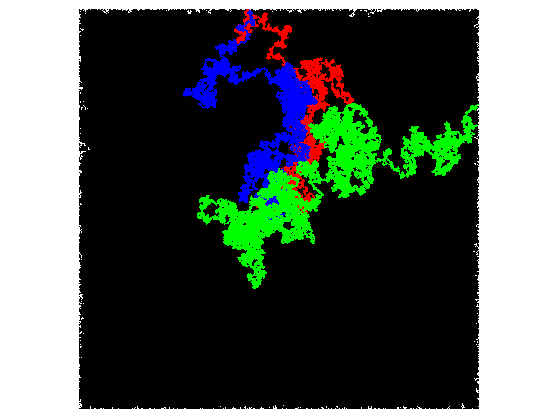

In [11]:
graficar_paseos(campo_gaussiano(3000), 0.4, 'paseos_aleatorios_M_3000_a_0.4_p_3')

In [ ]:
graficar_paseos(campo_gaussiano(3000), 0.4, 'paseos_aleatorios_M_3000_a_0.4_p_3')

## Calcular $ c(a) $

### GFF

In [ ]:
function Phimr = campo(M)
  if mod(M,2) ~= 0
    error('M debe ser par');
  end

  N = M;
  m = 0; % largo de correlación 1/m
  alpha = zeros(M);

  [X, Y] = meshgrid(linspace(0, 1/2, M/2+1), linspace(0, 1/2, M/2+1));

  % Parte superior izquierda
  for i = 2:(M+1)/2
    for j = 2:(M+1)/2
      alpha(i,j) = randn() / sqrt((i-1)^2 + (j-1)^2 + m^2) / (2*pi);
    end
  end

  % Extensión al resto del dominio por simetría
  for i = 2:M
    for j = 2:M
      if i > (M+1)/2 && j > (M+1)/2
        alpha(i,j) =  alpha(M - i + 2, M - j + 2);
      elseif i > (M+1)/2
        alpha(i,j) = -alpha(M - i + 2, j);
      elseif j > (M+1)/2
        alpha(i,j) = -alpha(i, M - j + 2);
      end
    end
  end

  % Transformada de Fourier y restricción al dominio relevante
  Phimr = real(fft2(alpha));
  Phimr = Phimr(1:M/2+1, 1:M/2+1);
end


### Calcular $\phi_{A_a}$

In [ ]:
function [phi0, stderr, comp_size] = phi_dirichlet_Pintar(phi, a, nsim, oi, oj)
  if nargin < 3 || isempty(nsim), nsim = 5000; end
  [K, ~] = size(phi);

  if nargin < 5 || isempty(oi) || isempty(oj)
      oi = ceil(K/2);
      oj = ceil(K/2);
  end

  % ===  Construir el conjunto A ===
  A = abs(phi) < a;

  % ===  Aplicar Pintar3 partiendo desde los bordes ===
  B = zeros(size(A));     
  A(1:K,1)   = 1;        
  A(1:K,K)   = 1;
  A(1,1:K)   = 1;
  A(K,1:K)   = 1;
  A_a = Pintar3(A,B,1,1,K);  % componente conexa conectada al borde

  comp_size = nnz(A_a);

  % ===  Simular paseos aleatorios ===
  dirs = [ -1 0; 1 0; 0 -1; 0 1 ];
  hits = zeros(nsim,1);

  for s = 1:nsim
      i = oi; j = oj;
      while true
          d = ceil(4*rand);
          ni = i + dirs(d,1);
          nj = j + dirs(d,2);

          if ni < 1 || ni > K || nj < 1 || nj > K || A_a(ni,nj)==1
              ci = min(max(ni,1),K);
              cj = min(max(nj,1),K);
              hits(s) = phi(ci,cj);
              break
          end

          i = ni; j = nj;
      end
  end

  phi0 = mean(hits);
  stderr = std(hits)/sqrt(nsim);
end


### Calcular $\mathbb{E}(\lvert \phi_{A_a}(0)\rvert^2)$

In [ ]:
function [c_val, vals_phiA, stderr] = c_funcion_MC(a, M, nfields, nsim)
  if nargin < 3 || isempty(nfields), nfields = 50; end
  if nargin < 4 || isempty(nsim), nsim = 5000; end

  vals_phiA = zeros(nfields,1);

  for k = 1:nfields
    [phi0, ~] = phi_dirichlet_Pintar( campo(M), a, nsim);

    vals_phiA(k) = phi0;
  end

  % Calcular c(a)
  c_val = sqrt(mean(abs(vals_phiA).^2));

  % Error estándar de la estimación de c(a)
  stderr = std(abs(vals_phiA).^2) / (2 * c_val * sqrt(nfields));
end


### Graficar $\mathbb{E}(\lvert \phi_{A_a}(0)\rvert^2)$

In [ ]:
function graficar_c_a(Phimr, M , nfields , nsim, nombre_salida)
    a_vals = 0:0.02:0.7;        % rango de a
    c_vals = zeros(size(a_vals));
    stderr_vals = zeros(size(a_vals));

    fprintf('Calculando c(a) para %d valores de a...\n', numel(a_vals));

    for k = 1:length(a_vals)
        a = a_vals(k);
        [c_vals(k), ~, stderr_vals(k)] = c_funcion_MC(a, M, nfields, nsim);
        fprintf('a = %.2f  -->  c(a) ≈ %.4f ± %.4f\n', a, c_vals(k), stderr_vals(k));
    end


    % === Gráfico ===
    figure;
    nice_color = [0.0 0.35 0.70];      
    edge_color = [0 0.15 0.35];    

    
    hold on


    
    plot(a_vals, c_vals, 'o', 'LineWidth', 1.5, 'MarkerSize', 6, 'MarkerEdgeColor', [0 0.2 0.4], 'MarkerEdgeColor', [0 0.2 0.4],'LineWidth', 1.2,'MarkerFaceColor', nice_color,'MarkerEdgeColor', edge_color);

   
    xlabel('a', 'FontSize', 12);
    ylabel('c(a)', 'FontSize', 12);
    title(sprintf('Estimación Monte Carlo de c(a) (M=%d, nfields=%d, nsim=%d)', M, nfields, nsim), 'FontSize', 11);
    hold off
    grid on;
    grid minor;
    


    print([nombre_salida '.jpg'], '-djpg', '-r300');  

end
